auto_charge_station_points       0.179520
auto_grid_points                 0.219980
cube_points                      0.175393
cone_points                      0.221590
endgame_charge_station_points    0.203516
dtype: float64


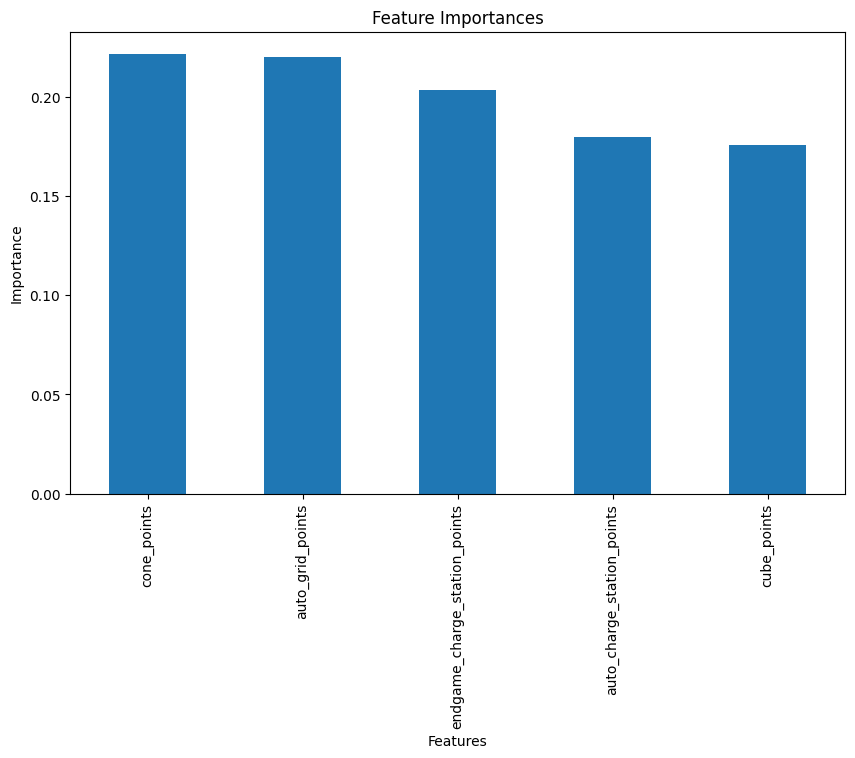

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Load your data
df = pd.read_csv("../data/frc_data/data_2.csv")  # Replace with your actual data file
df.drop('team', inplace=True, axis=1)

# Prepare your feature matrix X and target vector y
X = df.drop('rank', axis=1)
y = df['rank']
weights = 1 / y  # Weights inverse of rank

# Define the cross-validation parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store feature importances
feature_importances = np.zeros(X.shape[1])

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Loop over each fold in the cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train, sample_weight=weights_train)

    # Update the feature importances
    feature_importances += model.feature_importances_

# Average the feature importances over all folds
feature_importances /= kf.get_n_splits()

# Get the feature names
feature_names = X.columns.tolist()

# Create a pandas Series with the feature importances
importances = pd.Series(feature_importances, index=feature_names)

print(importances)

# Sort the features by importance
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()